In [1]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import squareform

In [119]:
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
#b-base, l-loop, s-skip, c-choice, o-order
traceDict = {'b1':['a','b','c','d','e'],
             'l1':['a','b','b','c','d','e'],'l2':['a','b','c','b','c','d','e'],'l3':['a','b','c','d','b','c','d','e'], 
             's1':['a','c','d','e'],'s2':['a','d','e'], 's3':['a','e'], 
             'c1':['a','x','y','z','e'], 'c2':['a','u','v','w','e'], 'c3':['a','k','l','m','e'], 
             'o1':['a','b','d','c','e'], 'o2':['a','d','b','c','e'], 'o3':['a','c','d','b','e']}

In [3]:
traceDict

{'b1': ['a', 'b', 'c', 'd', 'e'],
 'l1': ['a', 'b', 'b', 'c', 'd', 'e'],
 'l2': ['a', 'b', 'c', 'b', 'c', 'd', 'e'],
 'l3': ['a', 'b', 'c', 'd', 'b', 'c', 'd', 'e'],
 's1': ['a', 'c', 'd', 'e'],
 's2': ['a', 'd', 'e'],
 's3': ['a', 'e'],
 'c1': ['a', 'x', 'y', 'z', 'e'],
 'c2': ['a', 'u', 'v', 'w', 'e'],
 'c3': ['a', 'k', 'l', 'm', 'e'],
 'o1': ['a', 'b', 'd', 'c', 'e'],
 'o2': ['a', 'd', 'b', 'c', 'e'],
 'o3': ['a', 'c', 'd', 'b', 'e']}

In [4]:
log = pd.DataFrame(traceDict.items(), columns=['ID', 'Trace'])

In [5]:
log

,ID,Trace
0,b1,"[a, b, c, d, e]"
1,l1,"[a, b, b, c, d, e]"
2,l2,"[a, b, c, b, c, d, e]"
3,l3,"[a, b, c, d, b, c, d, e]"
4,s1,"[a, c, d, e]"
5,s2,"[a, d, e]"
6,s3,"[a, e]"
7,c1,"[a, x, y, z, e]"
8,c2,"[a, u, v, w, e]"
9,c3,"[a, k, l, m, e]"


In [6]:
# Add ground-truth
trueList = ['b','l','l','l','s','s','s','c','c','c','o','o','o']
log['Type'] = trueList
log

,ID,Trace,Type
0,b1,"[a, b, c, d, e]",b
1,l1,"[a, b, b, c, d, e]",l
2,l2,"[a, b, c, b, c, d, e]",l
3,l3,"[a, b, c, d, b, c, d, e]",l
4,s1,"[a, c, d, e]",s
5,s2,"[a, d, e]",s
6,s3,"[a, e]",s
7,c1,"[a, x, y, z, e]",c
8,c2,"[a, u, v, w, e]",c
9,c3,"[a, k, l, m, e]",c


In [7]:
#Change to string format
log["strings"] = log["Trace"].apply(lambda x: ''.join(x))
log

,ID,Trace,Type,strings
0,b1,"[a, b, c, d, e]",b,abcde
1,l1,"[a, b, b, c, d, e]",l,abbcde
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde
4,s1,"[a, c, d, e]",s,acde
5,s2,"[a, d, e]",s,ade
6,s3,"[a, e]",s,ae
7,c1,"[a, x, y, z, e]",c,axyze
8,c2,"[a, u, v, w, e]",c,auvwe
9,c3,"[a, k, l, m, e]",c,aklme


In [8]:
#Calculate Levenshtein distances

from Levenshtein import distance

In [9]:
List = list(log["strings"])

dist_matrix = np.zeros((len(List),len(List)),dtype=int)

for i in range(0,len(List)):
    for j in range(0,len(List)):
        dist_matrix[i,j] = distance(List[i],List[j])

lev_dis = dist_matrix
#lev_dis

In [10]:
#Create 1-gram

def createVector(charList):
    #dtype = [('structure', 'S10'), ('relfrequ', float)]
    arrayList = np.array(charList)
    unique, counts = np.unique(arrayList, return_counts=True)
    #calculate relative frequency
    relFrequList = np.array((unique, counts)).T
    uniqueList = list(unique)
    return relFrequList[relFrequList[:, 0].argsort()]
    #check completeness
    #if 'tree' not in uniqueList:
        #relFrequList = np.append(relFrequList, np.array([['tree', 0]]), axis=0)
        #print(relFrequList)

        
#Create 1-gram vector, indicating frequency of activities
log["1-gram"] = log["Trace"].apply(lambda x: createVector(tuple(x)))
log

,ID,Trace,Type,strings,1-gram
0,b1,"[a, b, c, d, e]",b,abcde,"[[a, 1], [b, 1], [c, 1], [d, 1], [e, 1]]"
1,l1,"[a, b, b, c, d, e]",l,abbcde,"[[a, 1], [b, 2], [c, 1], [d, 1], [e, 1]]"
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde,"[[a, 1], [b, 2], [c, 2], [d, 1], [e, 1]]"
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde,"[[a, 1], [b, 2], [c, 2], [d, 2], [e, 1]]"
4,s1,"[a, c, d, e]",s,acde,"[[a, 1], [c, 1], [d, 1], [e, 1]]"
5,s2,"[a, d, e]",s,ade,"[[a, 1], [d, 1], [e, 1]]"
6,s3,"[a, e]",s,ae,"[[a, 1], [e, 1]]"
7,c1,"[a, x, y, z, e]",c,axyze,"[[a, 1], [e, 1], [x, 1], [y, 1], [z, 1]]"
8,c2,"[a, u, v, w, e]",c,auvwe,"[[a, 1], [e, 1], [u, 1], [v, 1], [w, 1]]"
9,c3,"[a, k, l, m, e]",c,aklme,"[[a, 1], [e, 1], [k, 1], [l, 1], [m, 1]]"


In [11]:
#Change data format from string to list of unique characters
#logVar["charList"] = logVar["trace_variant"].apply(lambda x: list(x))
#logVar

def df_list(list_of_char):
    extList = list_of_char.copy()
    extList.insert(0, '*') 
    extList.append('$')
    list_new = []
    for i in range(len(extList)):
        new = ''.join(extList[i:i+2])
        list_new.append(new)
    del list_new[-1]
    return list_new

#Create 2-gram vector, indicating frequency of activities
log["dfList"] = log["Trace"].apply(lambda x: df_list(x))
log["2-gram"] = log["dfList"].apply(lambda x: createVector(x))
log

,ID,Trace,Type,strings,1-gram,dfList,2-gram
0,b1,"[a, b, c, d, e]",b,abcde,"[[a, 1], [b, 1], [c, 1], [d, 1], [e, 1]]","[*a, ab, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 1], [cd, 1], [de, 1], ..."
1,l1,"[a, b, b, c, d, e]",l,abbcde,"[[a, 1], [b, 2], [c, 1], [d, 1], [e, 1]]","[*a, ab, bb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bb, 1], [bc, 1], [cd, 1], ..."
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde,"[[a, 1], [b, 2], [c, 2], [d, 1], [e, 1]]","[*a, ab, bc, cb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cb, 1], [cd, 1], ..."
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde,"[[a, 1], [b, 2], [c, 2], [d, 2], [e, 1]]","[*a, ab, bc, cd, db, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cd, 2], [db, 1], ..."
4,s1,"[a, c, d, e]",s,acde,"[[a, 1], [c, 1], [d, 1], [e, 1]]","[*a, ac, cd, de, e$]","[[*a, 1], [ac, 1], [cd, 1], [de, 1], [e$, 1]]"
5,s2,"[a, d, e]",s,ade,"[[a, 1], [d, 1], [e, 1]]","[*a, ad, de, e$]","[[*a, 1], [ad, 1], [de, 1], [e$, 1]]"
6,s3,"[a, e]",s,ae,"[[a, 1], [e, 1]]","[*a, ae, e$]","[[*a, 1], [ae, 1], [e$, 1]]"
7,c1,"[a, x, y, z, e]",c,axyze,"[[a, 1], [e, 1], [x, 1], [y, 1], [z, 1]]","[*a, ax, xy, yz, ze, e$]","[[*a, 1], [ax, 1], [e$, 1], [xy, 1], [yz, 1], ..."
8,c2,"[a, u, v, w, e]",c,auvwe,"[[a, 1], [e, 1], [u, 1], [v, 1], [w, 1]]","[*a, au, uv, vw, we, e$]","[[*a, 1], [au, 1], [e$, 1], [uv, 1], [vw, 1], ..."
9,c3,"[a, k, l, m, e]",c,aklme,"[[a, 1], [e, 1], [k, 1], [l, 1], [m, 1]]","[*a, ak, kl, lm, me, e$]","[[*a, 1], [ak, 1], [e$, 1], [kl, 1], [lm, 1], ..."


In [12]:
# 1. transfer strings (string numbers) to integers --> HERE we need a new encoding!

#logVar = logVar.astype({"trace_variant": str}) #--> only needed if list values were transformed to int at one point

def intEncoder(character_List):
    return [np.where(np.array(list(dict.fromkeys(character_List)))==e)[0][0]for e in character_List]

log["intList"] = log["Trace"].apply(lambda x: intEncoder(x))
log

,ID,Trace,Type,strings,1-gram,dfList,2-gram,intList
0,b1,"[a, b, c, d, e]",b,abcde,"[[a, 1], [b, 1], [c, 1], [d, 1], [e, 1]]","[*a, ab, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 1], [cd, 1], [de, 1], ...","[0, 1, 2, 3, 4]"
1,l1,"[a, b, b, c, d, e]",l,abbcde,"[[a, 1], [b, 2], [c, 1], [d, 1], [e, 1]]","[*a, ab, bb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bb, 1], [bc, 1], [cd, 1], ...","[0, 1, 1, 2, 3, 4]"
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde,"[[a, 1], [b, 2], [c, 2], [d, 1], [e, 1]]","[*a, ab, bc, cb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cb, 1], [cd, 1], ...","[0, 1, 2, 1, 2, 3, 4]"
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde,"[[a, 1], [b, 2], [c, 2], [d, 2], [e, 1]]","[*a, ab, bc, cd, db, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cd, 2], [db, 1], ...","[0, 1, 2, 3, 1, 2, 3, 4]"
4,s1,"[a, c, d, e]",s,acde,"[[a, 1], [c, 1], [d, 1], [e, 1]]","[*a, ac, cd, de, e$]","[[*a, 1], [ac, 1], [cd, 1], [de, 1], [e$, 1]]","[0, 1, 2, 3]"
5,s2,"[a, d, e]",s,ade,"[[a, 1], [d, 1], [e, 1]]","[*a, ad, de, e$]","[[*a, 1], [ad, 1], [de, 1], [e$, 1]]","[0, 1, 2]"
6,s3,"[a, e]",s,ae,"[[a, 1], [e, 1]]","[*a, ae, e$]","[[*a, 1], [ae, 1], [e$, 1]]","[0, 1]"
7,c1,"[a, x, y, z, e]",c,axyze,"[[a, 1], [e, 1], [x, 1], [y, 1], [z, 1]]","[*a, ax, xy, yz, ze, e$]","[[*a, 1], [ax, 1], [e$, 1], [xy, 1], [yz, 1], ...","[0, 1, 2, 3, 4]"
8,c2,"[a, u, v, w, e]",c,auvwe,"[[a, 1], [e, 1], [u, 1], [v, 1], [w, 1]]","[*a, au, uv, vw, we, e$]","[[*a, 1], [au, 1], [e$, 1], [uv, 1], [vw, 1], ...","[0, 1, 2, 3, 4]"
9,c3,"[a, k, l, m, e]",c,aklme,"[[a, 1], [e, 1], [k, 1], [l, 1], [m, 1]]","[*a, ak, kl, lm, me, e$]","[[*a, 1], [ak, 1], [e$, 1], [kl, 1], [lm, 1], ...","[0, 1, 2, 3, 4]"


In [13]:
## Levenshtein Distance

In [14]:
from Levenshtein import distance

List = list(log["strings"])

Matrix = np.zeros((len(List),len(List)),dtype=int)

for i in range(0,len(List)):
    for j in range(0,len(List)):
        Matrix[i,j] = distance(List[i],List[j])

Matrix

array([[0, 1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2],
       [1, 0, 1, 2, 2, 3, 4, 4, 4, 4, 2, 2, 3],
       [2, 1, 0, 1, 3, 4, 5, 5, 5, 5, 3, 3, 4],
       [3, 2, 1, 0, 4, 5, 6, 6, 6, 6, 3, 3, 3],
       [1, 2, 3, 4, 0, 1, 2, 3, 3, 3, 2, 3, 1],
       [2, 3, 4, 5, 1, 0, 1, 3, 3, 3, 2, 2, 2],
       [3, 4, 5, 6, 2, 1, 0, 3, 3, 3, 3, 3, 3],
       [3, 4, 5, 6, 3, 3, 3, 0, 3, 3, 3, 3, 3],
       [3, 4, 5, 6, 3, 3, 3, 3, 0, 3, 3, 3, 3],
       [3, 4, 5, 6, 3, 3, 3, 3, 3, 0, 3, 3, 3],
       [2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 0, 2, 2],
       [2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 0, 2],
       [2, 3, 4, 3, 1, 2, 3, 3, 3, 3, 2, 2, 0]])

In [15]:
## Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [16]:
## Agglomerative Clustering
clusteringAgg = AgglomerativeClustering(n_clusters=6, metric='precomputed', linkage ='complete').fit(Matrix)
labels_Agg = clusteringAgg.labels_

#distance_threshold=0

#print(labels_Agg)

#Clustering Evaluation
#https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

print(f"Homogeneity: {metrics.homogeneity_score(trueList, labels_Agg):.3f}")
print(f"Completeness: {metrics.completeness_score(trueList, labels_Agg):.3f}")
print(f"V-measure: {metrics.v_measure_score(trueList, labels_Agg):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(trueList, labels_Agg):.3f}")
print(f"Adjusted Mutual Information:{metrics.adjusted_mutual_info_score(trueList, labels_Agg):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(Matrix, labels_Agg):.3f}") # --> used if ground truth labels are not known!

[0 0 0 0 1 1 1 5 4 3 0 0 2]
Homogeneity: 0.699
Completeness: 0.730
V-measure: 0.714
Adjusted Rand Index: 0.346
Adjusted Mutual Information:0.438
Silhouette Coefficient: -0.002


C:\Users\la1949\Anaconda3\envs\pm4py\lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


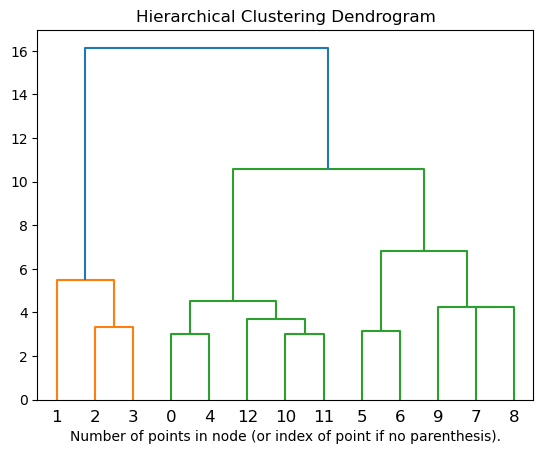

In [17]:
## Visualize Hierarchy
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(Matrix)
#model = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage ='complete').fit(Matrix)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

C:\Users\la1949\AppData\Local\Temp\ipykernel_8976\1856517861.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(Matrix, method='single')


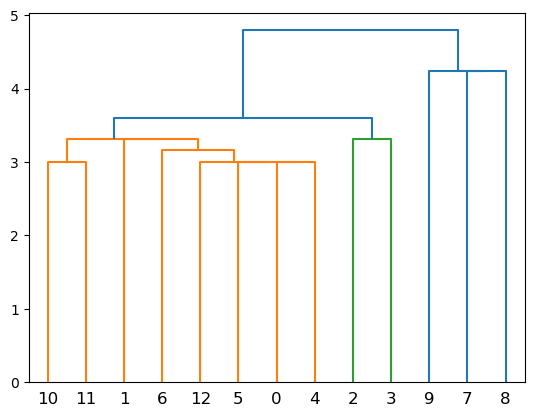

In [18]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(Matrix, method='single')
plt.figure()
dn = hierarchy.dendrogram(Z)

C:\Users\la1949\AppData\Local\Temp\ipykernel_8976\446150901.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(Matrix, "single")


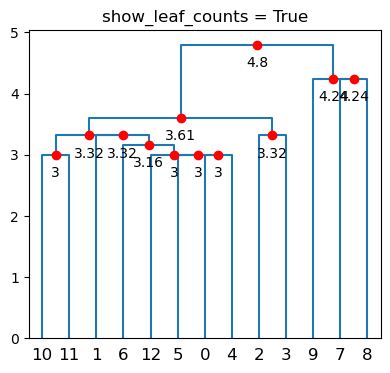

In [203]:
#Augmented Dendogram

def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata


#from scipy.cluster.hierarchy import linkage
#import matplotlib.pyplot as plt


linkage_matrix = linkage(Matrix, "single")

plt.figure(1, figsize=(10, 4))
plt.clf()

plt.subplot(1, 2, 1)
show_leaf_counts = True
ddata = augmented_dendrogram(linkage_matrix,
               color_threshold=2,
               p=13,
               truncate_mode='lastp',
               show_leaf_counts=show_leaf_counts,
               )
plt.title("show_leaf_counts = %s" % show_leaf_counts)

#plt.subplot(1, 2, 2)
#show_leaf_counts = True
#ddata = augmented_dendrogram(linkage_matrix,
#               color_threshold=1,
#               p=13,
#               truncate_mode='lastp',
#               show_leaf_counts=show_leaf_counts,
#               )
#plt.title("show_leaf_counts = %s" % show_leaf_counts)

plt.show()

In [20]:
linkage_matrix

array([[ 0.        ,  4.        ,  3.        ,  2.        ],
       [ 5.        , 13.        ,  3.        ,  3.        ],
       [12.        , 14.        ,  3.        ,  4.        ],
       [10.        , 11.        ,  3.        ,  2.        ],
       [ 6.        , 15.        ,  3.16227766,  5.        ],
       [ 1.        , 17.        ,  3.31662479,  6.        ],
       [16.        , 18.        ,  3.31662479,  8.        ],
       [ 2.        ,  3.        ,  3.31662479,  2.        ],
       [19.        , 20.        ,  3.60555128, 10.        ],
       [ 7.        ,  8.        ,  4.24264069,  2.        ],
       [ 9.        , 22.        ,  4.24264069,  3.        ],
       [21.        , 23.        ,  4.79583152, 13.        ]])

In [116]:
#Calculate MST --> Variety

def mst(linkage_matrix):
    x = 0
    for i in linkage_matrix:
        x += i[2]
    return x

mst(linkage_matrix)

41.998816204249856

In [107]:
#Derive Ordering of Traces --> Marginal Variety

#Derive distance matrix after clustering (based on clusters)
cophenet_matrix = squareform(cophenet(linkage_matrix))
cophenet_matrix

array([[0.        , 3.31662479, 3.60555128, 3.60555128, 3.        ,
        3.        , 3.16227766, 4.79583152, 4.79583152, 4.79583152,
        3.31662479, 3.31662479, 3.        ],
       [3.31662479, 0.        , 3.60555128, 3.60555128, 3.31662479,
        3.31662479, 3.31662479, 4.79583152, 4.79583152, 4.79583152,
        3.31662479, 3.31662479, 3.31662479],
       [3.60555128, 3.60555128, 0.        , 3.31662479, 3.60555128,
        3.60555128, 3.60555128, 4.79583152, 4.79583152, 4.79583152,
        3.60555128, 3.60555128, 3.60555128],
       [3.60555128, 3.60555128, 3.31662479, 0.        , 3.60555128,
        3.60555128, 3.60555128, 4.79583152, 4.79583152, 4.79583152,
        3.60555128, 3.60555128, 3.60555128],
       [3.        , 3.31662479, 3.60555128, 3.60555128, 0.        ,
        3.        , 3.16227766, 4.79583152, 4.79583152, 4.79583152,
        3.31662479, 3.31662479, 3.        ],
       [3.        , 3.31662479, 3.60555128, 3.60555128, 3.        ,
        0.        , 3.16227

In [168]:
#Derive ordering of traces based on their marginal distance

def marginal_variety(pairwise_distances):
    # Create a copy of the pairwise distance matrix
    modified_distances = pairwise_distances.astype(float)
    traceOrder = []
    margVariety = []
    
    
    # Set diagonal elements to NaN
    np.fill_diagonal(modified_distances, np.nan)
    
    # Iterate to remove the desired number of minimum values
    for i in range(len(pairwise_distances)-1):
        # Find the minimum value and its indices
        min_val = np.nanmin(modified_distances)  # Use np.nanmin to ignore NaN values
        min_indices = np.argwhere(modified_distances == min_val)
        
        # Get the row and column indices to replace by NaN
        row_idx, col_idx = min_indices[0][0], min_indices[0][0]
        
        #Get order of traces + their marginal contribution to variety
        traceOrder.append(row_idx)
        margVariety.append(min_val)
        
        
        # Change values in the row and column corresponding to the minimum value to NaN
        modified_distances[row_idx, :] = np.nan
        modified_distances[:, col_idx] = np.nan
        
    #return modified_distances
    return traceOrder, margVariety #modified_distances



order, margVar = marginal_variety(cophenet_matrix)
margVar

[3.0,
 3.0,
 3.0,
 3.0,
 3.1622776601683795,
 3.3166247903554,
 3.3166247903554,
 3.3166247903554,
 3.605551275463989,
 4.242640687119285,
 4.242640687119285,
 4.795831523312719]

In [169]:
order

[0, 4, 5, 10, 6, 1, 2, 11, 3, 7, 8, 9]

## Calculate Alignments

In [165]:
#Optimal Alignment based on Needleman-Wunsch Algorithm
# See: https://gist.github.com/slowkow/06c6dba9180d013dfd82bec217d22eb5


def nw(x, y, match = 0, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    #print(F)
    return F[-1][-1]
    #return '\n'.join([rx, ry])

#x = "PCGUTTV"
#y = "PCGUTTW"
#nw(x, y)

In [205]:
def alignMatrix(list_of_strings):
    n = len(list_of_strings)
    dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

    for i in range(n):
        for j in range(i, n):
            dist_matrix[i,j] = nw(list_of_strings[i], list_of_strings[j])
            dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
            
    return dist_matrix


listVec = log["strings"]
Matrix_Align = alignMatrix(listVec)
Matrix_Align

array([[ 0., -1., -2., -3., -1., -2., -3., -3., -3., -3., -2., -2., -2.],
       [-1.,  0., -1., -2., -2., -3., -4., -4., -4., -4., -2., -2., -3.],
       [-2., -1.,  0., -1., -3., -4., -5., -5., -5., -5., -3., -3., -4.],
       [-3., -2., -1.,  0., -4., -5., -6., -6., -6., -6., -3., -3., -3.],
       [-1., -2., -3., -4.,  0., -1., -2., -3., -3., -3., -2., -3., -1.],
       [-2., -3., -4., -5., -1.,  0., -1., -3., -3., -3., -2., -2., -2.],
       [-3., -4., -5., -6., -2., -1.,  0., -3., -3., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3.,  0., -3., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3., -3.,  0., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3., -3., -3.,  0., -3., -3., -3.],
       [-2., -2., -3., -3., -2., -2., -3., -3., -3., -3.,  0., -2., -2.],
       [-2., -2., -3., -3., -3., -2., -3., -3., -3., -3., -2.,  0., -2.],
       [-2., -3., -4., -3., -1., -2., -3., -3., -3., -3., -2., -2.,  0.]])

In [174]:
#Create ordered list of Alignment costs

def marginal_alignments(pairwise_distances, order):
    # Create a copy of the pairwise distance matrix
    modified_distances = pairwise_distances.astype(float)
    #traceOrder = []
    margAlignments = []
    
    
    # Set diagonal elements to NaN
    np.fill_diagonal(modified_distances, np.nan)
    
    # Iterate to remove the desired number of minimum values
    #for i in range(len(pairwise_distances)-1):
    for i in order:
        # Find the minimum value and its indices
        min_val = np.nanmin(modified_distances[i])  # Use np.nanmin to ignore NaN values
        #min_indices = np.argwhere(modified_distances == min_val)
        
        # Get the row and column indices to replace by NaN
        #row_idx, col_idx = min_indices[0][0], min_indices[0][0]
        
        #Get order of traces + their marginal contribution to variety
        #traceOrder.append(row_idx)
        margAlignments.append(-min_val)
        
        
        # Change values in the row and column corresponding to the minimum value to NaN
        modified_distances[i, :] = np.nan
        modified_distances[:, i] = np.nan
        
    #return modified_distances
    return margAlignments #modified_distances



margAlignCosts = marginal_alignments(Matrix_Align, order)
margAlignCosts

[3.0, 4.0, 5.0, 3.0, 6.0, 4.0, 5.0, 3.0, 6.0, 3.0, 3.0, 3.0]

In [211]:
#Calculate increase in alignment costs
def alignIncrease(margAlignCosts):
    inAlign = [0]
    newAlign = 0
    for i in margAlignCosts:
        newAlign += i
        inAlign.append(newAlign)
    return inAlign

alignCostIncrease = alignIncrease(margAlignCosts)

In [179]:
alignCostIncrease

[0, 3.0, 7.0, 12.0, 15.0, 21.0, 25.0, 30.0, 33.0, 39.0, 42.0, 45.0, 48.0]

In [187]:
max(alignCostIncrease)

48.0

In [188]:
alignCostIncrease / max(alignCostIncrease)

array([0.        , 0.0625    , 0.14583333, 0.25      , 0.3125    ,
       0.4375    , 0.52083333, 0.625     , 0.6875    , 0.8125    ,
       0.875     , 0.9375    , 1.        ])

## Create diagram

In [198]:
#Create diagram

#Calculate decrease in variety

def varDecrease(var, margVar):
    deVar = [var]
    newVar = var
    for i in margVar:
        newVar -= i
        deVar.append(newVar)
    return deVar

varDecrease(logVar, margVar)

[41.998816204249856,
 38.998816204249856,
 35.998816204249856,
 32.998816204249856,
 29.998816204249856,
 26.836538544081478,
 23.51991375372608,
 20.20328896337068,
 16.886664173015284,
 13.281112897551294,
 9.038472210432008,
 4.7958315233127236,
 4.440892098500626e-15]

In [223]:
logVar

41.998816204249856

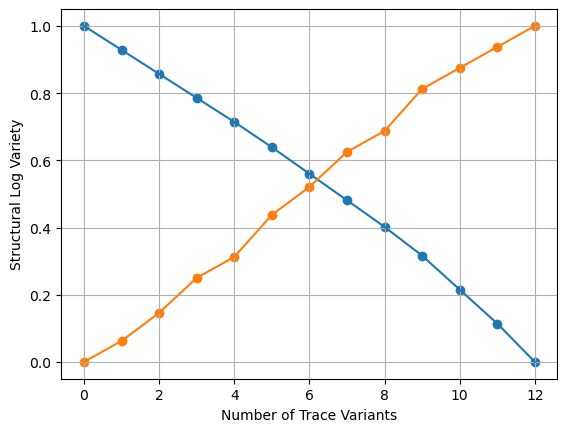

In [200]:
# Label für die y-Achse vergeben:
plt.ylabel('Structural Log Variety')
plt.xlabel('Number of Trace Variants')


x = list(range(0, len(cophenet_matrix)))
y = varDecrease(logVar, margVar)
y = y / max(y) #normalization

y2 = alignIncrease(alignCosts, margAlignCosts)
y2 = y2 / max(y2) #normalization

# Einen x-y-Plot erstellen:
plt.plot(x, y)
plt.plot(x, y2)

# plot scatter plot with x and y data 
plt.scatter(x, y)
plt.scatter(x, y2)

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([0, 5, 0, 20])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

## Variety based on Optimal Alignments

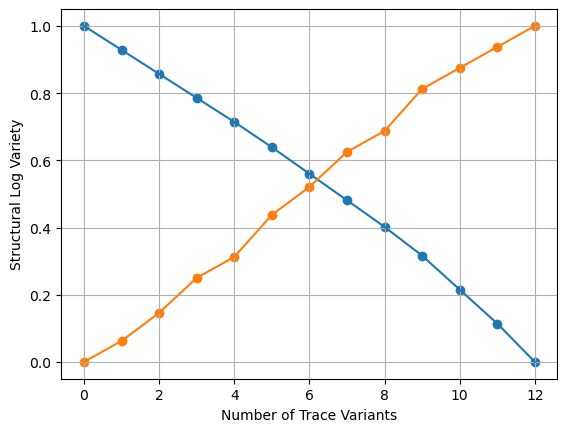

In [216]:
## Derive variety-alignments plot based on Optimal Alignments

#Derive alignment matrix
listVec = log["strings"]
Matrix_Align = alignMatrix(listVec)

#Calculate linkage matrix
linkage_matrix = linkage(Matrix_Align, "single")

#Calculate overall variety
logVar = mst(linkage_matrix)


#Derive distance matrix after clustering (based on clusters)
cophenet_matrix = squareform(cophenet(linkage_matrix))

#Derive ordering and marginal variety measures based on cophenet_matrix
order, margVar = marginal_variety(cophenet_matrix)


#Derive marginal alignment costs based on derived ordering
margAlignCosts = marginal_alignments(Matrix_Align, order)

#Generate list of decreasing variety
y = varDecrease(logVar, margVar)
y = y / max(y) #normalization

#Generate list of increasing alignment costs
y2 = alignIncrease(margAlignCosts)
y2 = y2 / max(y2) #normalization




#Create plot
# Label für die y-Achse vergeben:
plt.ylabel('Structural Log Variety')
plt.xlabel('Number of Trace Variants')


x = list(range(0, len(cophenet_matrix)))


# Einen x-y-Plot erstellen:
plt.plot(x, y)
plt.plot(x, y2)

# plot scatter plot with x and y data 
plt.scatter(x, y)
plt.scatter(x, y2)

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([0, 5, 0, 20])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

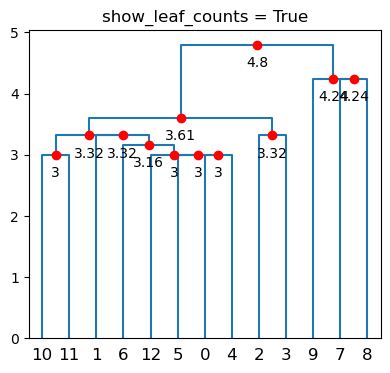

In [219]:
plt.figure(1, figsize=(10, 4))
plt.clf()

plt.subplot(1, 2, 1)
show_leaf_counts = True
ddata = augmented_dendrogram(linkage_matrix,
               color_threshold=2,
               p=13,
               truncate_mode='lastp',
               show_leaf_counts=show_leaf_counts,
               )
plt.title("show_leaf_counts = %s" % show_leaf_counts)

#plt.subplot(1, 2, 2)
#show_leaf_counts = True
#ddata = augmented_dendrogram(linkage_matrix,
#               color_threshold=1,
#               p=13,
#               truncate_mode='lastp',
#               show_leaf_counts=show_leaf_counts,
#               )
#plt.title("show_leaf_counts = %s" % show_leaf_counts)

plt.show()

## Back-Up

In [106]:
#Derive ordering of traces based on their marginal distance

def remove_min_values(pairwise_distances, num_values_to_remove):
    # Create a copy of the pairwise distance matrix
    modified_distances = pairwise_distances.astype(float)
    traceOrder = []
    
    
    # Set diagonal elements to NaN
    np.fill_diagonal(modified_distances, np.nan)
    
    # Iterate to remove the desired number of minimum values
    for i in range(num_values_to_remove):
        # Find the minimum value and its indices
        min_val = np.nanmin(modified_distances)  # Use np.nanmin to ignore NaN values
        min_indices = np.argwhere(modified_distances == min_val)
        
        # Get the row and column indices to remove
        row_idx, col_idx = min_indices[0][0], min_indices[0][0]
        
        #Get order of traces + their marginal contribution to variety
        traceOrder.append((row_idx,min_val))
        
        
        # Change values in the row and column corresponding to the minimum value to NaN
        modified_distances[row_idx, :] = np.nan
        modified_distances[:, col_idx] = np.nan
        
        
    #return modified_distances
    return traceOrder #modified_distances

# Example usage
pairwise_distances = np.array([[0, 1, 5, 3],
                               [1, 0, 2, 2],
                               [5, 2, 0, 3],
                               [3, 2, 3, 0]])

num_values_to_remove = 3
remove_min_values(pairwise_distances, num_values_to_remove)


[(0, 1.0), (1, 2.0), (2, 3.0)]

In [23]:
#Alternative Min Spanning Tree

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

#Undirected graph consisting of 4 nodes, where the edges (value) indicate weights (or distances) between nodes
#Zero indicates, there is no exsiting edge between the nodes
X = csr_matrix([[0, 8, 0, 3],
                [0, 0, 2, 5],
                [0, 0, 0, 6],
                [0, 0, 0, 0]])

Tcsr = minimum_spanning_tree(X)

Tcsr.toarray().astype(int)

array([[0, 0, 0, 3],
       [0, 0, 2, 5],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [24]:
#Use fcluster to identify cluster label for each observation (data point), when max # of clusters = t
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
cluster_labels

#Also possible based on distance
#cluster_labels = fcluster(linkage_matrix, t=3.6, criterion='distance')

array([1, 1, 2, 2, 1, 1, 1, 3, 4, 5, 1, 1, 1], dtype=int32)

In [25]:
#Clustering Evaluation
#https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

print(f"Homogeneity: {metrics.homogeneity_score(trueList, cluster_labels):.3f}")
print(f"Completeness: {metrics.completeness_score(trueList, cluster_labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(trueList, cluster_labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(trueList, cluster_labels):.3f}")
print(f"Adjusted Mutual Information:{metrics.adjusted_mutual_info_score(trueList, cluster_labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(Matrix, cluster_labels):.3f}") # --> used if ground truth labels are not known!

Homogeneity: 0.502
Completeness: 0.660
V-measure: 0.570
Adjusted Rand Index: 0.158
Adjusted Mutual Information:0.245
Silhouette Coefficient: 0.218


In [26]:
from sksequitur import Parser
from sksequitur import Grammar

In [27]:
from sksequitur import Mark
from sksequitur import parse

In [28]:
parser = Parser()
parser.feed('ab')
parser.feed([Mark()])
parser.feed('cab')
parser.feed([Mark()])
parser.feed('c')
parser.feed([Mark()])
parser.feed('cababbbab')
grammar = Grammar(parser.tree)
print(grammar)

0 -> 1 | 2 | c | 2 1 b b 1
1 -> a b                                          ab
2 -> c 1                                          cab


In [29]:
print(parse('abcabc'))

0 -> 1 1
1 -> a b c                                        abc


See links:
https://towardsdatascience.com/visualizing-complex-data-simplifying-tree-structures-using-grammar-induction-b4843b5daaf4
Paper: https://ieeexplore.ieee.org/document/8138776

In [149]:
log

,ID,Trace,Type,strings,1-gram,dfList,2-gram,intList,Entropy
0,b1,"[a, b, c, d, e]",b,abcde,"[[a, 1], [b, 1], [c, 1], [d, 1], [e, 1]]","[*a, ab, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 1], [cd, 1], [de, 1], ...","[0, 1, 2, 3, 4]",2.321928
1,l1,"[a, b, b, c, d, e]",l,abbcde,"[[a, 1], [b, 2], [c, 1], [d, 1], [e, 1]]","[*a, ab, bb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bb, 1], [bc, 1], [cd, 1], ...","[0, 1, 1, 2, 3, 4]",2.251629
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde,"[[a, 1], [b, 2], [c, 2], [d, 1], [e, 1]]","[*a, ab, bc, cb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cb, 1], [cd, 1], ...","[0, 1, 2, 1, 2, 3, 4]",2.235926
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde,"[[a, 1], [b, 2], [c, 2], [d, 2], [e, 1]]","[*a, ab, bc, cd, db, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cd, 2], [db, 1], ...","[0, 1, 2, 3, 1, 2, 3, 4]",2.250000
4,s1,"[a, c, d, e]",s,acde,"[[a, 1], [c, 1], [d, 1], [e, 1]]","[*a, ac, cd, de, e$]","[[*a, 1], [ac, 1], [cd, 1], [de, 1], [e$, 1]]","[0, 1, 2, 3]",2.000000
5,s2,"[a, d, e]",s,ade,"[[a, 1], [d, 1], [e, 1]]","[*a, ad, de, e$]","[[*a, 1], [ad, 1], [de, 1], [e$, 1]]","[0, 1, 2]",1.584963
6,s3,"[a, e]",s,ae,"[[a, 1], [e, 1]]","[*a, ae, e$]","[[*a, 1], [ae, 1], [e$, 1]]","[0, 1]",1.000000
7,c1,"[a, x, y, z, e]",c,axyze,"[[a, 1], [e, 1], [x, 1], [y, 1], [z, 1]]","[*a, ax, xy, yz, ze, e$]","[[*a, 1], [ax, 1], [e$, 1], [xy, 1], [yz, 1], ...","[0, 1, 2, 3, 4]",2.321928
8,c2,"[a, u, v, w, e]",c,auvwe,"[[a, 1], [e, 1], [u, 1], [v, 1], [w, 1]]","[*a, au, uv, vw, we, e$]","[[*a, 1], [au, 1], [e$, 1], [uv, 1], [vw, 1], ...","[0, 1, 2, 3, 4]",2.321928
9,c3,"[a, k, l, m, e]",c,aklme,"[[a, 1], [e, 1], [k, 1], [l, 1], [m, 1]]","[*a, ak, kl, lm, me, e$]","[[*a, 1], [ak, 1], [e$, 1], [kl, 1], [lm, 1], ...","[0, 1, 2, 3, 4]",2.321928


In [32]:
listVec = log["strings"]

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = nw(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_align = dist_matrix
dist_matrix_align

array([[10.,  8.,  6.,  4.,  6.,  2., -2.,  1.,  1.,  1.,  4.,  4.,  4.],
       [ 8., 12., 10.,  8.,  4.,  0., -4., -1., -1., -1.,  5.,  5.,  2.],
       [ 6., 10., 14., 12.,  2., -2., -6., -3., -3., -3.,  3.,  3.,  0.],
       [ 4.,  8., 12., 16.,  0., -4., -8., -5., -5., -5.,  4.,  4.,  4.],
       [ 6.,  4.,  2.,  0.,  8.,  4.,  0.,  0.,  0.,  0.,  3.,  0.,  6.],
       [ 2.,  0., -2., -4.,  4.,  6.,  2., -1., -1., -1.,  2.,  2.,  2.],
       [-2., -4., -6., -8.,  0.,  2.,  4., -2., -2., -2., -2., -2., -2.],
       [ 1., -1., -3., -5.,  0., -1., -2., 10.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1., -3., -5.,  0., -1., -2.,  1., 10.,  1.,  1.,  1.,  1.],
       [ 1., -1., -3., -5.,  0., -1., -2.,  1.,  1., 10.,  1.,  1.,  1.],
       [ 4.,  5.,  3.,  4.,  3.,  2., -2.,  1.,  1.,  1., 10.,  4.,  4.],
       [ 4.,  5.,  3.,  4.,  0.,  2., -2.,  1.,  1.,  1.,  4., 10.,  4.],
       [ 4.,  2.,  0.,  4.,  6.,  2., -2.,  1.,  1.,  1.,  4.,  4., 10.]])

In [161]:

def nw(x, y, match = 0, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    #return '\n'.join([rx, ry])
    return F
    #return F[-1][-1]

x = "GATTACA"
y = "GCATGCU"
print(nw(x,y))
F = nw(x, y)
# G-ATTACA
# GCA-TGCU

[[ 0. -1. -2. -3. -4. -5. -6. -7.]
 [-1.  0. -1. -2. -3. -4. -5. -6.]
 [-2. -1. -1. -1. -2. -3. -4. -5.]
 [-3. -2. -2. -2. -1. -2. -3. -4.]
 [-4. -3. -3. -3. -2. -2. -3. -4.]
 [-5. -4. -4. -3. -3. -3. -3. -4.]
 [-6. -5. -4. -4. -4. -4. -3. -4.]
 [-7. -6. -5. -4. -5. -5. -4. -4.]]


In [166]:
#Alignment Matrix
listVec = log["strings"]

n = len(listVec)
dist_matrix = np.zeros((n,n))    # initialize distance matrix to a square of zeros

for i in range(n):
    for j in range(i, n):
        dist_matrix[i,j] = nw(listVec[i], listVec[j])
        dist_matrix[j,i] = dist_matrix[i,j]       # for the symmetric part, no computation
        
dist_matrix_align = dist_matrix
dist_matrix_align

array([[ 0., -1., -2., -3., -1., -2., -3., -3., -3., -3., -2., -2., -2.],
       [-1.,  0., -1., -2., -2., -3., -4., -4., -4., -4., -2., -2., -3.],
       [-2., -1.,  0., -1., -3., -4., -5., -5., -5., -5., -3., -3., -4.],
       [-3., -2., -1.,  0., -4., -5., -6., -6., -6., -6., -3., -3., -3.],
       [-1., -2., -3., -4.,  0., -1., -2., -3., -3., -3., -2., -3., -1.],
       [-2., -3., -4., -5., -1.,  0., -1., -3., -3., -3., -2., -2., -2.],
       [-3., -4., -5., -6., -2., -1.,  0., -3., -3., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3.,  0., -3., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3., -3.,  0., -3., -3., -3., -3.],
       [-3., -4., -5., -6., -3., -3., -3., -3., -3.,  0., -3., -3., -3.],
       [-2., -2., -3., -3., -2., -2., -3., -3., -3., -3.,  0., -2., -2.],
       [-2., -2., -3., -3., -3., -2., -3., -3., -3., -3., -2.,  0., -2.],
       [-2., -3., -4., -3., -1., -2., -3., -3., -3., -3., -2., -2.,  0.]])

## Calculate Entropy

In [33]:
import collections

In [34]:
# Calculate Entropy

def summary_statistic(window):
    counter = collections.Counter(window)  # count the occurrences of each element in the window
    freqs = np.array(list(counter.values()))  # extract the frequency counts and store them as a numpy array
    freqs = freqs / freqs.sum()  # normalize the frequencies to obtain a probability distribution
    entropy = -np.sum(freqs * np.log(freqs)) / np.log(2) # compute the entropy of the probability distribution
    return entropy

#Example
a = ["A", "A", "A", "A", "B"] 
a2 = traceDict['b1']
summary_statistic(a2)

2.3219280948873626

In [35]:
log['Entropy'] = log['Trace'].apply(summary_statistic)

In [36]:
#Entropy decreases when loops and/or skips occur
log

,ID,Trace,Type,strings,1-gram,dfList,2-gram,intList,Entropy
0,b1,"[a, b, c, d, e]",b,abcde,"[[a, 1], [b, 1], [c, 1], [d, 1], [e, 1]]","[*a, ab, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 1], [cd, 1], [de, 1], ...","[0, 1, 2, 3, 4]",2.321928
1,l1,"[a, b, b, c, d, e]",l,abbcde,"[[a, 1], [b, 2], [c, 1], [d, 1], [e, 1]]","[*a, ab, bb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bb, 1], [bc, 1], [cd, 1], ...","[0, 1, 1, 2, 3, 4]",2.251629
2,l2,"[a, b, c, b, c, d, e]",l,abcbcde,"[[a, 1], [b, 2], [c, 2], [d, 1], [e, 1]]","[*a, ab, bc, cb, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cb, 1], [cd, 1], ...","[0, 1, 2, 1, 2, 3, 4]",2.235926
3,l3,"[a, b, c, d, b, c, d, e]",l,abcdbcde,"[[a, 1], [b, 2], [c, 2], [d, 2], [e, 1]]","[*a, ab, bc, cd, db, bc, cd, de, e$]","[[*a, 1], [ab, 1], [bc, 2], [cd, 2], [db, 1], ...","[0, 1, 2, 3, 1, 2, 3, 4]",2.250000
4,s1,"[a, c, d, e]",s,acde,"[[a, 1], [c, 1], [d, 1], [e, 1]]","[*a, ac, cd, de, e$]","[[*a, 1], [ac, 1], [cd, 1], [de, 1], [e$, 1]]","[0, 1, 2, 3]",2.000000
5,s2,"[a, d, e]",s,ade,"[[a, 1], [d, 1], [e, 1]]","[*a, ad, de, e$]","[[*a, 1], [ad, 1], [de, 1], [e$, 1]]","[0, 1, 2]",1.584963
6,s3,"[a, e]",s,ae,"[[a, 1], [e, 1]]","[*a, ae, e$]","[[*a, 1], [ae, 1], [e$, 1]]","[0, 1]",1.000000
7,c1,"[a, x, y, z, e]",c,axyze,"[[a, 1], [e, 1], [x, 1], [y, 1], [z, 1]]","[*a, ax, xy, yz, ze, e$]","[[*a, 1], [ax, 1], [e$, 1], [xy, 1], [yz, 1], ...","[0, 1, 2, 3, 4]",2.321928
8,c2,"[a, u, v, w, e]",c,auvwe,"[[a, 1], [e, 1], [u, 1], [v, 1], [w, 1]]","[*a, au, uv, vw, we, e$]","[[*a, 1], [au, 1], [e$, 1], [uv, 1], [vw, 1], ...","[0, 1, 2, 3, 4]",2.321928
9,c3,"[a, k, l, m, e]",c,aklme,"[[a, 1], [e, 1], [k, 1], [l, 1], [m, 1]]","[*a, ak, kl, lm, me, e$]","[[*a, 1], [ak, 1], [e$, 1], [kl, 1], [lm, 1], ...","[0, 1, 2, 3, 4]",2.321928
